# Tutorial 5
## Outline
* Auto-differentiation frameworks: tensorflow and pytorch
* Nomenclatures and general components of training a NN
* PyTorch Tensors
* Building an NN with pytorch


## Tenserflow vs PyTorch

* PyTorch is developed by Facebook
* TensorFlow is developed by Google. Keras is a front-end API of TensorFlow.

### Similarities
* Both are auto-differentiation framework
* Both are open source
* Both support CPU and GPU executions
* Both have a large and active community

### Dissimilarities
#### Graph structure
* Depending on version, TensorFlow is either static graph (version 1) or dynamic graph (version 2, with eager execution), but not as efficient as static graph
* PyTorch is completely dynamic graph, and is efficient (sometimes even more efficient than TF with static graph!)


#### Language support
* TensorFlow supports a large variety of languages, i.e. C++, JavaScript, Python, C#, Ruby, and Swift.
* PyTorch only supports python

#### Deployment
* Tensorflow can be easily deployed into different platforms, including mobile devices!
* PyTorch code has to be converted into a different framework for depolyment

### General suggestions
* TensorFlow (with Keras) is easier to use for trying out existing models on a new dataset with minimal modifications on the architecture
* It is also good for building simple models, like MLP networks 
* PyTorch is more useful in research, when you would like to try complicated NN architectures and needs to do a lot of debuggingg and validation of ideas, but do not care about deployment

## Nomenclatures and general components of training a NN
* **Epoch**: Going through training data once
* **Batch**: Set of data for calculating each gradient update
* **Batch size**: Size of data in a batch
* **Iteration**: One iteration = one gradient update
* **Learning rate**: Coefficient multiplied to the gradient in each update

### Neural network architecture
* Multiple layer perceptron (MLP)
* Convolutional neural network (CNN)
* Graph convolutional neural network (GCN)
* Recurrent neural network (RNN)
* AutoEncoder (AE) 
* Attention mechanism / Transformer 
* ...

### Optimizer
* SGD (SGDM)
* Adam
* RMSProp
* ...

### Loss function
* Mean squared error (MSE)
* Mean absolute error (MAE)
* Cosine similarity 
* Binary crossentropy (CE) 
* Categorical crossentropy
* ...

## PyTorch: Tensors

Here we introduce the most fundamental PyTorch concept: the **Tensor**. A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

In [ ]:
import torch
import numpy as np

a = torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])
a.size()

torch.Size([3, 2])

In [ ]:
a.reshape(-1)

tensor([0.1000, 1.2000, 2.2000, 3.1000, 4.9000, 5.2000])

In [ ]:
x = torch.linspace(np.pi, 2, 20)

Convert numpy array to torch and vice versa

In [ ]:
a = np.ones((3,2))
type(a)

numpy.ndarray

In [ ]:
b = torch.tensor(a, dtype=torch.int)
b

tensor([[1, 1],
        [1, 1],
        [1, 1]], dtype=torch.int32)

In [ ]:
b.detach().numpy()

array([[1, 1],
       [1, 1],
       [1, 1]], dtype=int32)

Specify the device and data types for torch tensors

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# if torch.cuda.is_available():   does the same as the line above
#     device = torch.device("cuda:0")
# else:
#     device = torch.device("cpu")
dtype = torch.float
a = torch.randn((2,3), device=device, dtype=dtype)

In [ ]:
a.to(torch.device("cpu"))

tensor([[ 0.2410, -0.8301, -0.0355],
        [ 0.7025,  0.0887,  0.0685]])

## Building NN for regression task
For example, let's use a two hidden-layer MLP network [20, 15, 1] to simulate the Rosenbrock banana function!<br>
$f(x,y)=(1-x)^2+10(y-x^2)^2$<br>
$x\in[-2,2],y\in[-2,2]$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

def generate_X(number):
    xs=(np.random.random(number)*2-1)*2
    ys=(np.random.random(number)*2-1)*2
    return np.hstack([xs.reshape(-1,1),ys.reshape(-1,1)])
    
def generate_data(number,stochascity=0.05):
    X=generate_X(number)
    xs=X[:,0]
    ys=X[:,1]
    fs=(1-xs)**2 + 10*(ys - xs**2)**2
    stochastic_ratio=(np.random.random(number)*2-1)*stochascity+1
    return np.hstack([xs.reshape(-1,1),ys.reshape(-1,1)]),fs*stochastic_ratio

<IPython.core.display.Javascript object>


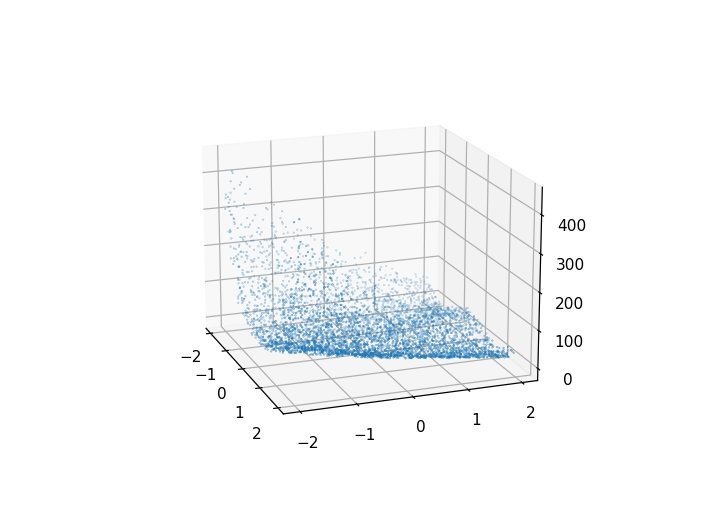

In [ ]:
x, y = generate_data(5000, 0.3)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], y, s=0.1)

### Building a PyTorch model

In [ ]:
from torch import nn  # import neural network form torch
import torch

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()  # use it in nn.Module
        self.layers = nn.Sequential(   # stack things together like a lego to build model structure
            nn.Linear(2, 20), # first layer
            loss = nn.
        )
        
    def forward(self, x):
        return self.layers(x)
    

In [ ]:
model = MLP()
weights = model.state_dict()
model.load_state_dict(weights)
print(model)
weights

MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=1, bias=True)
  )
)


OrderedDict([('layers.0.weight',
              tensor([[ 0.1821, -0.1976],
                      [ 0.2729,  0.6114],
                      [-0.4451,  0.2026],
                      [ 0.3185,  0.2134],
                      [ 0.5373, -0.3894],
                      [ 0.4950,  0.2439],
                      [-0.3038, -0.5413],
                      [-0.3749, -0.6191],
                      [ 0.3659, -0.1631],
                      [-0.0676,  0.2778],
                      [-0.1068, -0.0178],
                      [-0.4407, -0.4679],
                      [-0.3634, -0.1092],
                      [ 0.4888, -0.0141],
                      [ 0.3457, -0.0362],
                      [ 0.1082,  0.6880],
                      [-0.4497, -0.2953],
                      [ 0.0561,  0.5438],
                      [-0.3271,  0.1034],
                      [-0.6587,  0.2440]])),
             ('layers.0.bias',
              tensor([ 0.6454, -0.1077, -0.4211,  0.2840,  0.1514, -0.4156,  0.4943,  0.2637,

In [ ]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

best_loss = float('inf')
best_weights = {}

for i in range(100):
    train_X, train_y = generate_data(128, stochascity=0.1)
    train_X = torch.tensor(train_X, dtype=torch.float)
    train_y = torch.tensor(train_y, dtype=torch.float)
    pred = model(train_X) # predict
    loss = loss_func(pred, train_y.reshape(-1, 1)) # get loss, gradient gotten automatically
    optimizer.zero_grad()   # don't memorize gradient of the previous step, if you dont do this step, grad will get larger and larger and weights will explode
    loss.backward()  # will do backpropagation by itself
    optimizer.step()  # will update weights 
    if loss.item() < best_loss:
        best_weights = model.state_dict{}
        best_loss = loss.item()
    print("Iteration %d: Loss value - %.4f" % (i + 1, loss.item()))

model.load_state_dict(best_model) 

Iteration 1: Loss value - 4740.6675
Iteration 2: Loss value - 8403.4736
Iteration 3: Loss value - 5043.4985
Iteration 4: Loss value - 7867.3931
Iteration 5: Loss value - 4607.0542
Iteration 6: Loss value - 8040.2578
Iteration 7: Loss value - 6281.0503
Iteration 8: Loss value - 7263.2539
Iteration 9: Loss value - 8173.9297
Iteration 10: Loss value - 4733.6953
Iteration 11: Loss value - 4013.1479
Iteration 12: Loss value - 4992.6831
Iteration 13: Loss value - 4568.9209
Iteration 14: Loss value - 6772.9453
Iteration 15: Loss value - 4200.8159
Iteration 16: Loss value - 6595.1641
Iteration 17: Loss value - 6541.1802
Iteration 18: Loss value - 4576.9902
Iteration 19: Loss value - 7150.4243
Iteration 20: Loss value - 7840.4414
Iteration 21: Loss value - 6549.0054
Iteration 22: Loss value - 6585.2100
Iteration 23: Loss value - 6931.7373
Iteration 24: Loss value - 7030.9526
Iteration 25: Loss value - 7431.8403
Iteration 26: Loss value - 5367.8193
Iteration 27: Loss value - 5517.8809
Iteration 

<IPython.core.display.Javascript object>


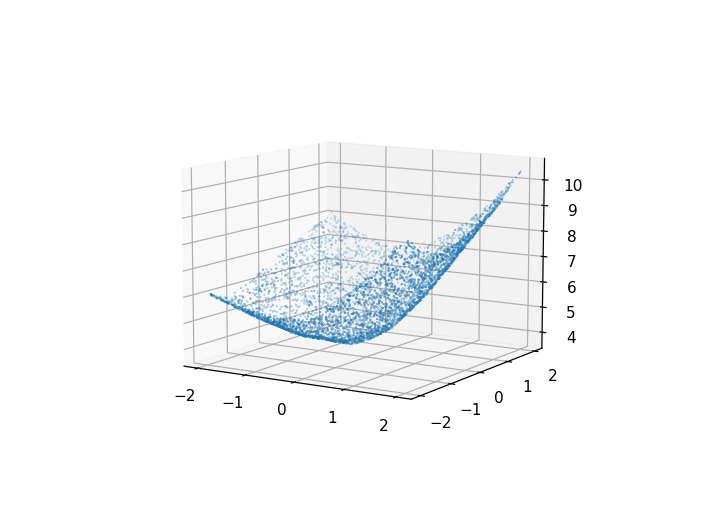

In [ ]:
new_X = generate_X(5000)
with torch.no_grad():  # everything inside will not run a gradient
    new_y = model(torch.tensor(new_X, dtype=torch.float))
new_y = new_y.detach().numpy()
fig = plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_y, s=0.1)

The graph doesn't match, and the loss is large, but it still got something similar!